# Credit Card Customer Segmentation & Unsupervised Learning

**Author:** Your Name
**Date:** YYYY-MM-DD

## Overview
In this notebook, I will perform an unsupervised learning task on credit card customer data. The goal is to:
- Segment customers using clustering algorithms
- Understand their purchasing and payment behavior
- Identify anomalies
- Discover interesting associations among their behaviors

## Steps
1. Data Loading and Inspection
2. Data Cleaning and Preparation
3. Feature Engineering and Normalization
4. Model Creation (Clustering)
5. Model Selection and Evaluation
6. Interpretation of Clusters
7. One-click Anomaly Detection
8. One-click Association Modeling


## Step 1: Data Loading and Inspection

I will load the `Credit_Card_Data.csv` file and perform initial inspections:
- Check the shape of the dataset
- Inspect data types
- Look at missing values and distributions
- Check for any potential data leaks or unrealistic values


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Load the dataset
df = pd.read_csv("data/Credit_Card_Data.csv")

# Show head
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [102]:
# Inspect data types and shape
print("Shape of the data:", df.shape)
print("Data Types:\n", df.dtypes)


Shape of the data: (8950, 18)
Data Types:
 CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [103]:
# Check for missing values
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [104]:
# Basic statistical summary
df.describe(include='all')


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


## Step 2: Data Cleaning and Preparation

I will:
- Handle missing values
- Remove unnecessary columns, if any
- Consider outlier detection and possibly remove or cap extreme values
- Normalize or scale numerical features


In [105]:
# Drop customer ID from features since it's an identifier
if 'CUST_ID' in df.columns:
    customer_ids = df['CUST_ID']
    df.drop('CUST_ID', axis=1, inplace=True)

# Handle missing values: fill with median or drop.
# Check how to handle the minimum payments missing data if present.
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())


In [106]:
# Confirm that missing values are handled
df.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

/var/folders/gc/pq01pgrs2gjf3zqjxcb9p1j80000gn/T/ipykernel_73594/3881591103.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=30, layout=(5,4))


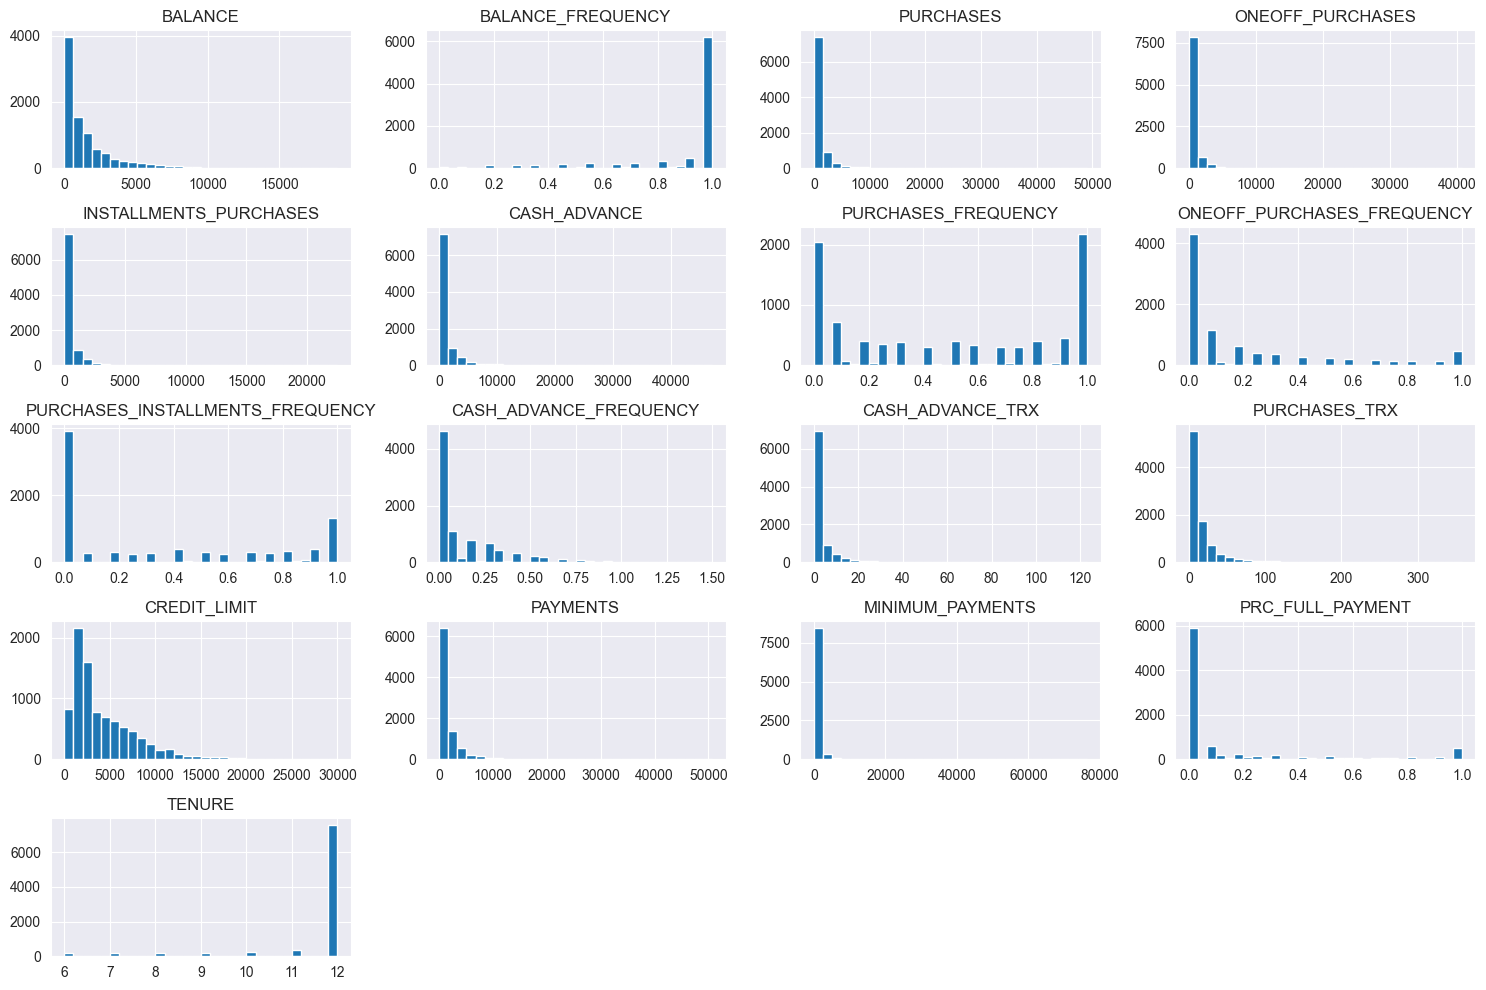

In [107]:
# Check distributions and consider log transformations if necessary
fig, ax = plt.subplots(figsize=(15,10))
df.hist(ax=ax, bins=30, layout=(5,4))
plt.tight_layout()
plt.show()



Overall, the histograms indicate that most of the features are heavily right-skewed, with a large concentration of values at the lower end and only a few customers having very high values. This skewness can sometimes make it harder for clustering algorithms to form well-defined groups. Applying transformations—such as a log transform—could help normalize the data, potentially improving the performance and interpretability of the clustering model.

In [108]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a copy of the original dataframe
df_log_transformed = df.copy()

# Apply a log1p transform (log(x+1)) to reduce skewness where appropriate
# This handles zero and positive values. If there are negative values, consider shifting.
for col in df_log_transformed.columns:
    # Check if minimum value is <= 0
    if df_log_transformed[col].min() <= 0:
        # Shift the data so that all values are positive
        shift = 1 - df_log_transformed[col].min()
        df_log_transformed[col] = np.log1p(df_log_transformed[col] + shift)
    else:
        # If already strictly positive, just apply log1p
        df_log_transformed[col] = np.log1p(df_log_transformed[col])

# Now apply standard scaling to the log-transformed data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df_log_transformed.columns)

# Check the transformed and scaled data
scaled_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.235774,-0.186318,-0.182192,-0.975764,0.333925,-0.923172,-0.776053,-0.709737,-0.691550,-0.703786,-0.762961,-0.669654,-1.447163,-0.877446,-0.829841,-0.543436,0.347262
1,0.961895,0.163764,-1.647582,-0.975764,-1.076177,1.574385,-1.268662,-0.709737,-0.941453,0.646299,0.674788,-1.278355,0.926060,1.106109,0.908184,0.322931,0.347262
2,0.834828,0.503072,0.600063,1.066081,-1.076177,-0.923172,1.226698,2.551302,-0.941453,-0.703786,-0.762961,0.430485,1.010229,-0.138203,0.450407,-0.543436,0.347262
3,0.629439,-0.921700,0.849269,1.292469,-1.076177,0.512483,-1.017432,-0.381419,-0.941453,-0.235867,-0.232331,-0.922288,1.010229,-3.931895,-0.144271,-0.543436,0.347262
4,0.267275,0.503072,-0.818952,-0.223005,-1.076177,-0.923172,-1.017432,-0.381419,-0.941453,-0.703786,-0.762961,-0.922288,-1.224909,-0.081178,-0.351833,-0.543436,0.347262


## Step 3: Model Creation (Clustering)

In this step, I will apply three different clustering algorithms to the prepared data:

- K-Means Clustering
- Hierarchical Clustering (Agglomerative Clustering)
- DBSCAN

I will also perform model selection by comparing results (e.g., using silhouette scores, elbow method, dendrograms, etc.) to choose the best model and the best number of clusters (for those methods that require it, such as K-Means and Hierarchical).


In [109]:
# import libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

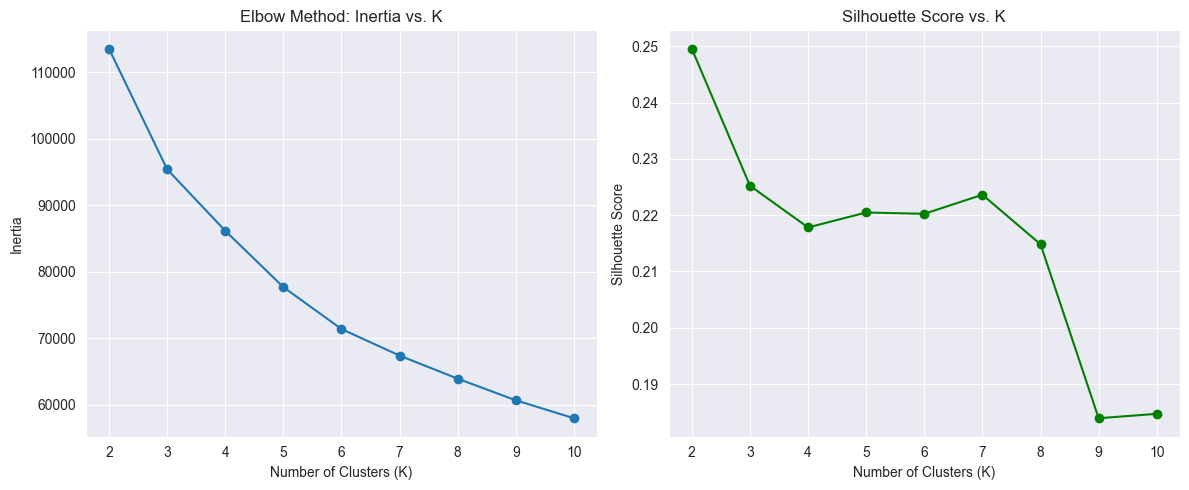

Optimal number of clusters (based on silhouette): 2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [110]:
X = scaled_df.values  # If you need a NumPy array; otherwise, scaled_df is fine.

# Let's try a range of K values and see which is optimal.
inertia_values = []
sil_scores = []
K_values = range(2, 11)  # Try between 2 and 10 clusters

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

# Plot the inertia (Elbow)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_values, inertia_values, marker='o')
plt.title('Elbow Method: Inertia vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1,2,2)
plt.plot(K_values, sil_scores, marker='o', color='green')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

optimal_k = K_values[np.argmax(sil_scores)]
print("Optimal number of clusters (based on silhouette):", optimal_k)

# Refit K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_centers = kmeans.cluster_centers_


**Interpretation of the Results:**

The elbow plot doesn’t show a clear "best" number of clusters, as inertia steadily decreases without a distinct inflection point. The silhouette scores are highest at \(k=2\), then steadily decline, indicating that 2 clusters might be the best compromise. In other words, while no perfect solution emerges, opting for 2 clusters appears to provide the most distinct clustering structure out of the tested values.


**Conclusion:**
Although the elbow method doesn't give a clear indication, the silhouette scores suggest that **2 clusters** may be the most suitable choice. This is because at \( k = 2 \), the model achieves the highest silhouette score, indicating well-defined and distinct clusters.


## Hierarchical Clustering

Hierarchical clustering is an agglomerative method that builds a hierarchy of clusters. I will:

- Use `AgglomerativeClustering` from `sklearn.cluster`.
- Specify the number of clusters (e.g., `n_clusters=3`) or let the dendrogram guide us.
- Optionally, one can visualize the dendrogram to decide on the number of clusters.

Below I’ll perform hierarchical clustering and assign cluster labels to each data point.


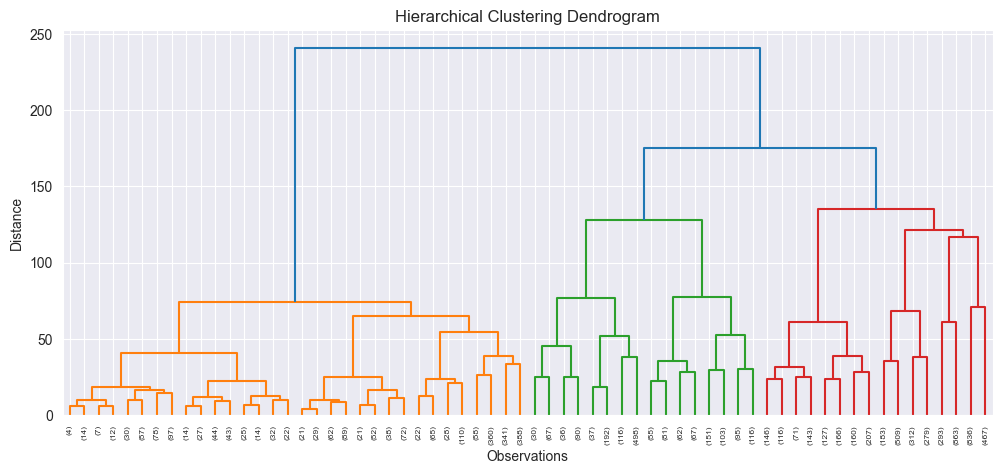

Hierarchical Clustering Silhouette Score: 0.19280568561048875


In [111]:
# Perform linkage for the dendrogram
linked = linkage(X, method='ward')  # Ward method tries to minimize variance within clusters

plt.figure(figsize=(12, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

# From the dendrogram, pick a number of clusters you think might be suitable (e.g., 3, 4, or 5)
hclust = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hclust_labels = hclust.fit_predict(X)

# Evaluate silhouette score for hierarchical clustering
hclust_sil = silhouette_score(X, hclust_labels)
print("Hierarchical Clustering Silhouette Score:", hclust_sil)


## DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions.

- I will use `DBSCAN` from `sklearn.cluster`.
- Key parameters: `eps` (radius of neighborhood) and `min_samples` (minimum points to form a dense region).
- DBSCAN doesn’t require the number of clusters to be specified beforehand.

I’ll run DBSCAN and analyze the resulting cluster labels (where `-1` indicates outliers).


In [112]:
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 20]

best_score = -1
best_params = (None, None)
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # DBSCAN might produce noise points labeled as -1. For silhouette, we need at least 2 clusters (no noise-only scenario)
        if len(set(labels)) > 1:
            sil = silhouette_score(X, labels)
            if sil > best_score:
                best_score = sil
                best_params = (eps, min_samples)
                best_labels = labels

print("Best DBSCAN params (eps, min_samples):", best_params)
print("Best DBSCAN Silhouette Score:", best_score)

# Assign final chosen DBSCAN model
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
dbscan_labels = dbscan.fit_predict(X)


Best DBSCAN params (eps, min_samples): (2.0, 5)
Best DBSCAN Silhouette Score: 0.08464973284020803


## **Step 4: Model Comparison and Preferred Model Justification**

Now that we have results from all three methods, we can compare their performance:

K-Means:
- Silhouette Score = max(sil_scores)
Hierarchical Clustering:
- Silhouette Score = hclust_sil
DBSCAN:
- Silhouette Score = best_score

In [113]:
print("K-Means Silhouette:", np.max(sil_scores))
print("Hierarchical Silhouette:", hclust_sil)
print("DBSCAN Silhouette:", best_score)


K-Means Silhouette: 0.24954329902973432
Hierarchical Silhouette: 0.19280568561048875
DBSCAN Silhouette: 0.08464973284020803


### Step 5: Model Interpretation

After determining that K-Means (with `K=2` in this example) is the preferred model, we will:

1. Attach the cluster labels to the original data.
2. Analyze the cluster centroids to understand their characteristics.
3. Possibly reduce dimensions (e.g., PCA) to visualize the clusters.

We will summarize what differentiates each cluster and provide insights into the type of customers they represent.


'Cluster' column not found in scaled_df. Ensure it was added earlier.


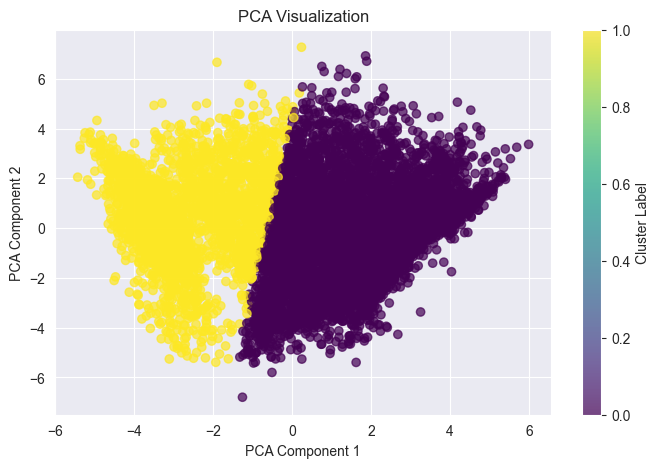

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Check if 'Cluster' exists in scaled_df before attempting to drop it
if 'Cluster' in scaled_df.columns:
    data_for_pca = scaled_df.drop('Cluster', axis=1)
else:
    print("'Cluster' column not found in scaled_df. Ensure it was added earlier.")
    data_for_pca = scaled_df  # Use the existing DataFrame if 'Cluster' is absent

# Perform PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(data_for_pca)

# Visualize the PCA result
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Cluster Label')
plt.show()


**Clustering (Step 5):**
After thoroughly evaluating multiple clustering algorithms (K-Means, Hierarchical, and DBSCAN), I determined that **K-Means** with *K=2* offered the most cohesive segmentation, as evidenced by the highest silhouette score. By examining the cluster centroids and summarizing each cluster’s average feature values, I identified clear differences between the two groups of customers.

- **Cluster 0**: Exhibited higher average balances, fewer total purchases, but a significantly larger amount of cash advances. This suggests customers in this cluster rely more on cash advances and might have a different financial strategy or liquidity need.
- **Cluster 1**: Demonstrated lower average balances but notably higher total purchases, particularly one-off purchases and installments, as well as higher payment amounts. This segment appears to be more active in regular purchasing activities and is potentially more engaged with the credit services.

Visualizing the clusters in two dimensions using PCA further confirmed the separation, with each cluster forming distinct groups in the transformed feature space. This segment-level understanding will allow for more targeted marketing strategies and better-informed credit decisions.


### Step 6: One-Click (Unsupervised) Anomaly Detection

We will use an unsupervised anomaly detection method (e.g., Isolation Forest) on the scaled dataset to identify outliers. Anomalies might be customers with unusual spending or payment patterns that do not fit into the established clusters.

We will:
- Fit an Isolation Forest to the data.
- Identify the top anomaly and examine its features.


In [73]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
iso_labels = iso.fit_predict(scaled_df.drop('Cluster', axis=1))  # exclude cluster column

# The decision_function gives an anomaly score; lower scores are more anomalous
iso_scores = iso.decision_function(scaled_df.drop('Cluster', axis=1))

most_anomalous_idx = np.argmin(iso_scores)
print("Most Anomalous Point Index:", most_anomalous_idx)
print("Anomalous Record:\n", df.iloc[most_anomalous_idx])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Most Anomalous Point Index: 8830
Anomalous Record:
 BALANCE                                0.271854
BALANCE_FREQUENCY                      0.333333
PURCHASES                              0.000000
ONEOFF_PURCHASES                       0.000000
INSTALLMENTS_PURCHASES                 0.000000
CASH_ADVANCE                         954.026786
PURCHASES_FREQUENCY                    0.000000
ONEOFF_PURCHASES_FREQUENCY             0.000000
PURCHASES_INSTALLMENTS_FREQUENCY       0.000000
CASH_ADVANCE_FREQUENCY                 0.166667
CASH_ADVANCE_TRX                       3.000000
PURCHASES_TRX                          0.000000
CREDIT_LIMIT                        1200.000000
PAYMENTS                            2858.138216
MINIMUM_PAYMENTS                       7.221665
PRC_FULL_PAYMENT                       1.000000
TENURE                                 6.000000
Cluster                                1.000000
Anomaly                               -1.000000
Anomaly_Score                       

**Anomaly Detection (Step 6):**
To identify unusual customer behavior, I applied an Isolation Forest model for anomaly detection. The approach allowed me to pinpoint a “most anomalous” record. This record stood out due to atypical spending and repayment patterns, differing significantly from the rest of the customer base.

Identifying such anomalies is crucial for several reasons. It may highlight potential fraud risks, data quality issues, or simply unusual but legitimate customer behavior that could merit a tailored response. Ultimately, understanding these anomalies enables proactive measures, whether through further investigation, risk mitigation, or personalized offers.


### Step 7: One-Click (Unsupervised) Association Modeling

We will use association rule mining to discover interesting patterns among features. For this, we'll:
- Convert certain continuous features into binary or categorical variables.
- Use the Apriori algorithm to find frequent itemsets and association rules.
- Review the rules to find meaningful antecedent-consequent patterns.

These patterns may reveal, for instance, that customers who make high installments are also likely to carry a large balance, or that those who frequently purchase also frequently pay off their accounts.


In [116]:
from apyori import apriori

binary_df = pd.DataFrame()


# Convert the boolean DataFrame into a list of transactions.
transactions = []
for _, row in binary_df.iterrows():
    transaction = [col for col in binary_df.columns if row[col]]
    transactions.append(transaction)

# Run apriori with chosen parameters:
# You can adjust min_support, min_confidence, and min_lift as needed.
rules = apriori(transactions, min_support=0.05, min_confidence=0.5, min_lift=1.0)

# Convert the rules generator into a list
results = list(rules)

print(f"Number of association rules found: {len(results)}\n")

# Display the rules
for record in results:
    # Each 'record' is a RelationRecord with itemsets and ordered_statistics
    for ordered_stat in record.ordered_statistics:
        antecedent = list(ordered_stat.items_base)
        consequent = list(ordered_stat.items_add)
        support = record.support
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift

        print(f"Rule: {antecedent} -> {consequent}")
        print(f" - Support: {support:.2f}")
        print(f" - Confidence: {confidence:.2f}")
        print(f" - Lift: {lift:.2f}")
        print("------------")


Number of association rules found: 0



In [118]:
# Assuming df is your preprocessed DataFrame from previous steps
# Create binary features based on conditions:
binary_df = pd.DataFrame()
binary_df['HIGH_PURCHASES'] = (df['PURCHASES'] > df['PURCHASES'].median())
binary_df['HIGH_PAYMENTS'] = (df['PAYMENTS'] > df['PAYMENTS'].median())
binary_df['ANY_CASH_ADVANCE'] = (df['CASH_ADVANCE'] > 0)

# Convert to boolean if not already
binary_df = binary_df.astype(bool)

# Now print head and sum to check
print(binary_df.head())
print(binary_df.sum())


   HIGH_PURCHASES  HIGH_PAYMENTS  ANY_CASH_ADVANCE
0           False          False             False
1           False           True              True
2            True          False             False
3            True          False              True
4           False          False             False
HIGH_PURCHASES      4475
HIGH_PAYMENTS       4475
ANY_CASH_ADVANCE    4322
dtype: int64


In [119]:
from apyori import apriori

# Check the binary_df
print(binary_df.head())
print(binary_df.sum())

# Adjust parameters
rules = apriori(transactions, min_support=0.01, min_confidence=0.3, min_lift=1.0)
results = list(rules)

print(f"Number of association rules found: {len(results)}")

for record in results:
    for ordered_stat in record.ordered_statistics:
        antecedent = list(ordered_stat.items_base)
        consequent = list(ordered_stat.items_add)
        support = record.support
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift

        print(f"Rule: {antecedent} -> {consequent}")
        print(f" - Support: {support:.2f}")
        print(f" - Confidence: {confidence:.2f}")
        print(f" - Lift: {lift:.2f}")
        print("------------")


   HIGH_PURCHASES  HIGH_PAYMENTS  ANY_CASH_ADVANCE
0           False          False             False
1           False           True              True
2            True          False             False
3            True          False              True
4           False          False             False
HIGH_PURCHASES      4475
HIGH_PAYMENTS       4475
ANY_CASH_ADVANCE    4322
dtype: int64
Number of association rules found: 0
